In [16]:
import pandas as pd
from scipy.stats import chi2_contingency
train_x = pd.read_csv('train_values.csv')
train_y = pd.read_csv('train_labels.csv')
test_x = pd.read_csv('test_values.csv')

In [2]:
train_y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
test_x.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [4]:
train_x.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
list(train_x.columns)

['patient_id',
 'slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

In [6]:
train = pd.merge(train_x,train_y,how='inner',on='patient_id')
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
assert len(train) == len(train_x)
assert len(train) == len(train_y)

In [45]:
train['age'].describe()

count    180.000000
mean      54.811111
std        9.334737
min       29.000000
25%       48.000000
50%       55.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

In [28]:
train.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [8]:
train.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [23]:
chest1 = pd.crosstab(train.chest_pain_type,train.heart_disease_present)
chest1
chi2_contingency(chest1)[3]

array([[ 7.22222222,  5.77777778],
       [15.55555556, 12.44444444],
       [31.66666667, 25.33333333],
       [45.55555556, 36.44444444]])

In [21]:
thal1 = pd.crosstab(train.thal,train.heart_disease_present)
thal1
chi2_contingency(thal1)[1]

4.479443308737818e-12

In [19]:
ekg1 = pd.crosstab(train.resting_ekg_results,train.heart_disease_present)
ekg1
chi2_contingency(ekg1)[1]

0.0778124124163021

In [26]:
vess1 = pd.crosstab(train.num_major_vessels,train.heart_disease_present)
vess1
chi2_contingency(vess1)[1]

2.3403633523653863e-07

In [31]:
fast1 = pd.crosstab(train.fasting_blood_sugar_gt_120_mg_per_dl,train.heart_disease_present)
fast1
chi2_contingency(fast1)[1]

0.8739268588224036

In [33]:
exer1 = pd.crosstab(train.exercise_induced_angina,train.heart_disease_present)
exer1
chi2_contingency(exer1)[1]

4.684875545829872e-09

In [36]:
sex1 = pd.crosstab(train.sex,train.heart_disease_present)
sex1
chi2_contingency(sex1)[1]

1.4369438555127181e-05

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1FF544888>,
      dtype=object)

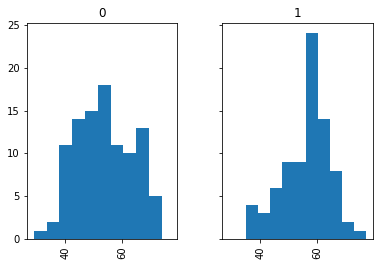

In [87]:
train.hist('age',by='heart_disease_present',sharex=True,sharey=True)

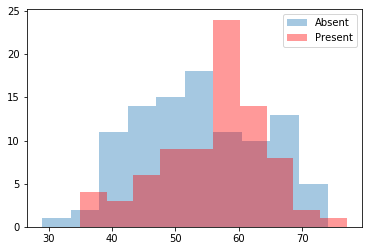

In [90]:
from matplotlib import pyplot

pyplot.hist(train[train['heart_disease_present']==0].age, alpha = 0.4, label='Absent')
pyplot.hist(train[train['heart_disease_present']==1].age, alpha = 0.4, label='Present',color = 'r')
pyplot.legend(loc = 'upper right')
pyplot.show()

In [95]:
import scipy.stats
#scipy.stats.anderson(train.age)
scipy.stats.levene(train[train['heart_disease_present']==0].age,train[train['heart_disease_present']==1].age)
#scipy.stats.shapiro(train.age)
#scipy.stats.ttest_ind(train[train['heart_disease_present']==0].age,train[train['heart_disease_present']==1].age)

LeveneResult(statistic=2.729954341677773, pvalue=0.10024497427448714)

In [27]:
train.describe

<bound method NDFrame.describe of     patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128       